In [1]:
import pandas as pd 
import re
import string
import nltk
import re
import seaborn as sns
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df1=pd.read_csv('australia_pp.csv')
df2=pd.read_csv('nigeria_pp.csv')
df3=pd.read_csv('england_pp.csv')
df4=pd.read_csv('denmark_pp.csv')

In [3]:
df1=df1.drop(columns=['Unnamed: 0'],axis=1)
df2=df2.drop(columns=['Unnamed: 0'],axis=1)
df3=df3.drop(columns=['Unnamed: 0'],axis=1)
df4=df4.drop(columns=['Unnamed: 0'],axis=1)


In [4]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)

In [5]:
text1=df1['english_only_text'][:100000].tolist()
text2=df2['english_only_text'][:100000].tolist()
text3=df3['english_only_text'][:100000].tolist()
text4=df4['english_only_text'][:100000].tolist()

C:\Users\Dheer\AppData\Local\Temp\ipykernel_7184\10571397.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  text1=df1['english_only_text'][:100000].tolist()
C:\Users\Dheer\AppData\Local\Temp\ipykernel_7184\10571397.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  text2=df2['english_only_text'][:100000].tolist()
C:\Users\Dheer\AppData\Local\Temp\ipykernel_7184\10571397.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future ve

In [6]:
t1=''
for i in text1:
    t1+=i
t2=''
for i in text2:
    t2+=i
t3=''
for i in text3:
    t3+=i
t4=''
for i in text4:
    t4+=i

In [7]:
corpus=[t1,t2,t3,t4]

In [8]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(corpus)
vocab = tfidf.vocabulary_

In [66]:
len(vocab)

246762

In [9]:
tfidf1 = TfidfVectorizer(vocabulary=vocab)
tfidf_vectors = tfidf1.fit_transform(corpus)

In [10]:
cosine_sim = cosine_similarity(tfidf_vectors)


In [11]:
similarity_df = pd.DataFrame(cosine_sim, columns=['Australia', 'Nigeria', 'England', 'Denmark'])

In [12]:
similarity_df.index = ['Australia', 'Nigeria', 'England', 'Denmark']
similarity_df.columns = ['Australia', 'Nigeria', 'England', 'Denmark']

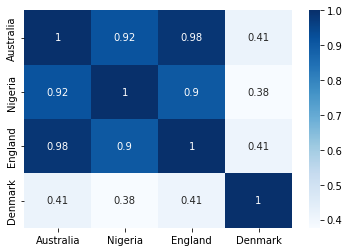

In [14]:
sns.heatmap(similarity_df, annot=True, cmap='Blues')
plt.savefig('text_sim_24.png')

In [28]:
tfidf_vectors[0].shape

(1, 5864)